# An experiment to assess if the overall performance of ensemble models is better than its constituent models

## Perform predictions

In [24]:
import requests

response = requests.post(url='http://localhost:5001/predict_mortality_for_all_ids', json={"targetStart":0, "targetEnd":7, "windowEnd":24, "saveIntermediate": True})

In [25]:
response.text

'Successfully created and stored the predictions at: data/mortality_prediction/ts_0_te_7_model.csv'

## Read model predictions

In [26]:
import pandas as pd

predictionPath = '~/phd/chapter_2/workspace/ClinicalOutcomesService/data/mortality_prediction/ts_0_te_7_model.csv'
dataDf = pd.read_csv(predictionPath)
dataDf

,VitalsMax_xgb,VitalsMax_lr,VitalsMax_lgbm,VitalsMax_mlp,VitalsMin_xgb,VitalsMin_lr,VitalsMin_lgbm,VitalsMin_mlp,VitalsAvg_xgb,VitalsAvg_lr,...,LabsFirst_xgb,LabsFirst_lr,LabsFirst_lgbm,LabsFirst_mlp,LabsLast_xgb,LabsLast_lr,LabsLast_lgbm,LabsLast_mlp,XGBensemble,y
0,0.003258,7.491436e-52,0.003913,1.210577e-77,0.000882,0.055435,0.001014,1.445783e-05,0.000306,0.002014,...,0.004371,0.155064,0.007725,2.740042e-07,0.000421,0.046988,0.000165,4.196488e-07,0.000194,False
1,0.011618,8.161027e-02,0.001621,1.733536e-02,0.010272,0.075803,0.005597,4.145178e-06,0.000144,0.084794,...,0.009622,0.118416,0.012158,5.227174e-04,0.001361,0.099422,0.004568,8.126920e-08,0.000218,False
2,0.012240,4.451277e-02,0.016981,6.791871e-02,0.042712,0.084194,0.108846,2.416163e-01,0.001615,0.050174,...,0.000322,0.082812,0.001436,2.998896e-04,0.000545,0.114174,0.001318,6.335306e-08,0.004821,False
3,0.006635,5.671703e-02,0.001740,1.201667e-02,0.000765,0.027221,0.000099,7.347530e-05,0.000386,0.012962,...,0.024418,0.094361,0.017242,2.758504e-04,0.000980,0.074344,0.001858,4.285757e-04,0.000509,False
4,0.000106,4.605020e-02,0.000214,5.095479e-03,0.000333,0.029560,0.000341,1.552083e-03,0.000302,0.031760,...,0.004178,0.120290,0.001819,8.708571e-06,0.019905,0.233843,0.013493,1.200313e-02,0.000301,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,0.000934,3.988031e-02,0.003181,1.550196e-03,0.000555,0.027389,0.000728,4.439128e-05,0.000063,0.021776,...,0.007151,0.115306,0.007624,2.375928e-05,0.000520,0.043625,0.000907,4.929931e-04,0.004933,False
2479,0.022310,9.673510e-02,0.013873,1.995313e-01,0.006599,0.122140,0.007605,1.905814e-04,0.003030,0.121818,...,0.006232,0.145487,0.014590,3.268088e-04,0.001053,0.105200,0.004690,4.767463e-03,0.002340,False
2480,0.000433,5.653576e-02,0.001202,2.156137e-02,0.000636,0.031882,0.001311,3.414479e-09,0.000511,0.039462,...,0.030278,0.092784,0.018049,1.242761e-02,0.007996,0.054819,0.002713,2.330055e-02,0.002165,False
2481,0.000431,6.474705e-02,0.000354,1.662829e-02,0.088364,0.134006,0.014557,7.241738e-03,0.001193,0.054687,...,0.000629,0.144293,0.003562,1.792153e-04,0.003867,0.085908,0.002625,2.114955e-05,0.000178,False


In [27]:
dataDf.y = [1 if (y > 0.5 ) else 0 for y in dataDf.y]
dataDf

,VitalsMax_xgb,VitalsMax_lr,VitalsMax_lgbm,VitalsMax_mlp,VitalsMin_xgb,VitalsMin_lr,VitalsMin_lgbm,VitalsMin_mlp,VitalsAvg_xgb,VitalsAvg_lr,...,LabsFirst_xgb,LabsFirst_lr,LabsFirst_lgbm,LabsFirst_mlp,LabsLast_xgb,LabsLast_lr,LabsLast_lgbm,LabsLast_mlp,XGBensemble,y
0,0.003258,7.491436e-52,0.003913,1.210577e-77,0.000882,0.055435,0.001014,1.445783e-05,0.000306,0.002014,...,0.004371,0.155064,0.007725,2.740042e-07,0.000421,0.046988,0.000165,4.196488e-07,0.000194,0
1,0.011618,8.161027e-02,0.001621,1.733536e-02,0.010272,0.075803,0.005597,4.145178e-06,0.000144,0.084794,...,0.009622,0.118416,0.012158,5.227174e-04,0.001361,0.099422,0.004568,8.126920e-08,0.000218,0
2,0.012240,4.451277e-02,0.016981,6.791871e-02,0.042712,0.084194,0.108846,2.416163e-01,0.001615,0.050174,...,0.000322,0.082812,0.001436,2.998896e-04,0.000545,0.114174,0.001318,6.335306e-08,0.004821,0
3,0.006635,5.671703e-02,0.001740,1.201667e-02,0.000765,0.027221,0.000099,7.347530e-05,0.000386,0.012962,...,0.024418,0.094361,0.017242,2.758504e-04,0.000980,0.074344,0.001858,4.285757e-04,0.000509,0
4,0.000106,4.605020e-02,0.000214,5.095479e-03,0.000333,0.029560,0.000341,1.552083e-03,0.000302,0.031760,...,0.004178,0.120290,0.001819,8.708571e-06,0.019905,0.233843,0.013493,1.200313e-02,0.000301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,0.000934,3.988031e-02,0.003181,1.550196e-03,0.000555,0.027389,0.000728,4.439128e-05,0.000063,0.021776,...,0.007151,0.115306,0.007624,2.375928e-05,0.000520,0.043625,0.000907,4.929931e-04,0.004933,0
2479,0.022310,9.673510e-02,0.013873,1.995313e-01,0.006599,0.122140,0.007605,1.905814e-04,0.003030,0.121818,...,0.006232,0.145487,0.014590,3.268088e-04,0.001053,0.105200,0.004690,4.767463e-03,0.002340,0
2480,0.000433,5.653576e-02,0.001202,2.156137e-02,0.000636,0.031882,0.001311,3.414479e-09,0.000511,0.039462,...,0.030278,0.092784,0.018049,1.242761e-02,0.007996,0.054819,0.002713,2.330055e-02,0.002165,0
2481,0.000431,6.474705e-02,0.000354,1.662829e-02,0.088364,0.134006,0.014557,7.241738e-03,0.001193,0.054687,...,0.000629,0.144293,0.003562,1.792153e-04,0.003867,0.085908,0.002625,2.114955e-05,0.000178,0


## Calculate average values for each standalone model

In [28]:
cols = ['VitalsMax', 'VitalsMin', 'VitalsAvg', 'VitalsSd', 'VitalsFirst', 'VitalsLast', 'LabsMax', 'LabsMin', 'LabsAvg', 'LabsSd', 'LabsFirst', 'LabsLast']

In [29]:
dataDf['xgb'] = dataDf[[col + '_xgb' for col in cols]].max(axis=1)
dataDf['lr'] = dataDf[[col + '_lr' for col in cols]].max(axis=1)
dataDf['lgbm'] = dataDf[[col + '_lgbm' for col in cols]].max(axis=1)
dataDf['mlp'] = dataDf[[col + '_mlp' for col in cols]].max(axis=1)

## Plot model predictions

### Function to calculate MCCF1

In [30]:
def calculateMccF1(x, y):
    import sys
    import os

    import rpy2.robjects as robjects
    from rpy2.robjects.packages import importr

    # import R's "base" package
    mccf1 = importr('mccf1')

    old_stdout = sys.stdout # backup current stdout
    sys.stdout = open(os.devnull, "w")
    p = robjects.FloatVector(x)
    t = robjects.FloatVector(y)
    calculateMccf1 = robjects.r['mccf1']
    summary = robjects.r['summary']
    out = summary(calculateMccf1(t, p), 50)[0][0]
    sys.stdout = old_stdout # reset old stdout
    return out


In [31]:
plot_colors = ['#FF1F5B', '#00CD6C', '#009ADE', '#AF58BA', '#FFC61E']
labels_to_display = ['XGB (Best value)', 'LR (Best value)', 'LGBM (Best value)', 'MLP (Best value)', 'XGB Ensemble']
labels = ['xgb', 'lr', 'lgbm', 'mlp', 'XGBensemble']

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score


dataDict = {
    'group': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'Average Precision': [],
    'F1': [],
    'AUROC': [],
    'MCCF1': []
}

for label in labels:
    dataDict['group'].append(label)
    dataDict['Accuracy'].append(accuracy_score(dataDf.y, [(0 if pred < 0.5 else 1) for pred in dataDf[label]]))
    dataDict['Balanced Accuracy'].append(balanced_accuracy_score(dataDf.y, [(0 if pred < 0.5 else 1) for pred in dataDf[label]]))
    dataDict['Average Precision'].append(average_precision_score(dataDf.y, [(0 if pred < 0.5 else 1) for pred in dataDf[label]]))
    dataDict['F1'].append(f1_score(dataDf.y, [(0 if pred < 0.5 else 1) for pred in dataDf[label]]))
    dataDict['AUROC'].append(roc_auc_score(dataDf.y, dataDf[label]))
    dataDict['MCCF1'].append(calculateMccF1(dataDf.y, [(0 if pred < 0.5 else 1) for pred in dataDf[label]]))


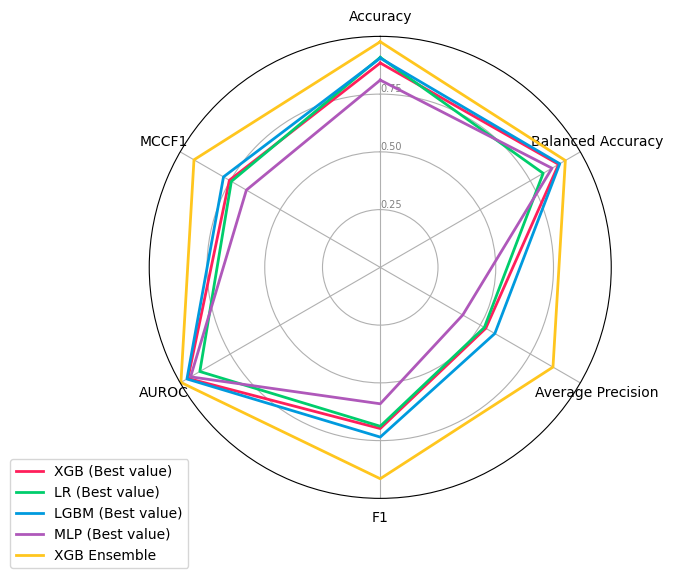

In [33]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame(dataDict)
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
# ax.figsize(10, 10)
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

for i in [0, 1, 2, 3, 4]:
    # Ind1
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=labels_to_display[i], color=plot_colors[i])
    # ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


In [34]:
df

,group,Accuracy,Balanced Accuracy,Average Precision,F1,AUROC,MCCF1
0,xgb,0.884817,0.891774,0.527500,0.697674,0.961403,0.754135
1,lr,0.908981,0.814420,0.520309,0.687845,0.901732,0.744252
2,lgbm,0.905759,0.897276,0.572767,0.734694,0.966230,0.783479
3,mlp,0.810713,0.858486,0.412398,0.590592,0.947826,0.669189
4,XGBensemble,0.976641,0.925285,0.863416,0.914956,0.996329,0.931081
